[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fin-py/geo-data-hands-on/blob/main/docs/geopandas.ipynb)

# GeoPandas

GeoPandasは、Pythonで地理空間データを容易に操作できるPythonパッケージです。pandasのデータ型を拡張して、形や位置などの空間データを扱えます。

## GeoDataFrame

GeoDataFrameは、DataFrameを拡張したデータ型です。空間情報を持つGeoSeries型の列が含まれます。GeoSeriesの要素はShapelyのGeometricオブジェクトです。

![geodataframe](./images/geodataframe.png)

### 地価公示データ

> 国土数値情報ダウンロードサイト
> 
> TOP > 国土数値情報 > 地価公示データ
> 
> https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L01-v3_1.html

In [1]:
from urllib import request

import folium
from folium.plugins import HeatMap
import geopandas as gpd
import pandas as pd
from shapely import from_geojson

In [2]:
gdf = gpd.read_file(
    "https://raw.githubusercontent.com/fin-py/geo-data-hands-on/main/data/L01-23_13.geojson"
)
gdf.head()

,L01_001,L01_002,L01_003,L01_004,L01_005,L01_006,L01_007,L01_008,L01_009,L01_010,...,L01_133,L01_134,L01_135,L01_136,L01_137,L01_138,L01_139,L01_140,L01_141,geometry
0,000,001,000,001,2023,3340000,3.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.74481 35.69014)
1,000,002,000,002,2023,2110000,3.4,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.73752 35.68120)
2,000,003,000,003,2023,4280000,3.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.73287 35.68814)
3,000,004,000,004,2023,1620000,3.2,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,POINT (139.74647 35.69862)
4,000,005,000,005,2023,3110000,3.3,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.74615 35.69608)


In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### GeoSeries

GeoSeriesは、Seriesを拡張したデータ型です。地理空間データであるGeoSeriesは、「geometry」という列名(GeoJSONではgeometryメンバー)でgeometry型としてGeoDataFrameに追加されます。それ以外の列(GeoJSONではpropertiesメンバー)は、pandasと同じデータ型で読み込まれます。

In [4]:
gdf.dtypes

L01_001       object
L01_002       object
L01_003       object
L01_004       object
L01_005       object
              ...   
L01_138       object
L01_139       object
L01_140       object
L01_141       object
geometry    geometry
Length: 142, dtype: object

GeoSeriesの要素は、Geometricオブジェクトになります。次のコードから、0番目の要素はPointであることが確認できます。

In [5]:
geoseries = gdf.loc[:, "geometry"]
geoseries.head()

0    POINT (139.74481 35.69014)
1    POINT (139.73752 35.68120)
2    POINT (139.73287 35.68814)
3    POINT (139.74647 35.69862)
4    POINT (139.74615 35.69608)
Name: geometry, dtype: geometry

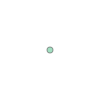

In [6]:
point = geoseries.iloc[0]
point

`coords` 属性、 `x` 属性、 `y` 属性にアクセスすると、Geometricオブジェクトの座標を参照できます。

In [7]:
point.coords[:]

[(139.744815, 35.69014)]

In [8]:
point.x, point.y

(139.744815, 35.69014)

### .cxインデクサ

GeoDataFrame、GeoSeriesには、.cxインデクサと呼ばれる、空間座標に特化したインデクサがあります。添え字を[経度,緯度]の形式で指定でき、スライス記法も使えます。

ここでは、JR山手線の四隅の領域を `bounds` 属性で取得し、この領域内の地価公示データにアクセスします。

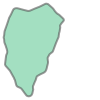

In [9]:
with request.urlopen(
    "https://raw.githubusercontent.com/fin-py/geo-data-hands-on/main/data/jr_yamanote_polygon.geojson"
) as res:
    yamanote = from_geojson(res.read())

yamanote

In [10]:
yamanote.bounds

(139.6994, 35.61677, 139.77976, 35.74053)

In [11]:
gdf.shape

(2602, 142)

In [12]:
included_within_yamanote = gdf.cx[139.6994:139.77976, 35.61677:35.74053]
included_within_yamanote

,L01_001,L01_002,L01_003,L01_004,L01_005,L01_006,L01_007,L01_008,L01_009,L01_010,...,L01_133,L01_134,L01_135,L01_136,L01_137,L01_138,L01_139,L01_140,L01_141,geometry
0,000,001,000,001,2023,3340000,3.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.74481 35.69014)
1,000,002,000,002,2023,2110000,3.4,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.73752 35.68120)
2,000,003,000,003,2023,4280000,3.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.73287 35.68814)
3,000,004,000,004,2023,1620000,3.2,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,POINT (139.74647 35.69862)
4,000,005,000,005,2023,3110000,3.3,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.74615 35.69608)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,005,006,005,006,2023,1110000,6.7,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.76984 35.72988)
1144,005,008,005,008,2023,1160000,6.4,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.77644 35.72852)
1146,005,010,005,010,2023,569000,4.6,1,false,false,...,00000000000000,40000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.77128 35.73731)
1148,005,012,005,012,2023,772000,5.9,1,false,false,...,00000000000000,40000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (139.77712 35.73615)


### Pointをヒートマップに可視化

In [13]:
center = yamanote.centroid.coords[:][0][::-1]

In [14]:
land_price_data = included_within_yamanote.apply(
    lambda s: pd.Series((s["geometry"].y, s["geometry"].x, s["L01_101"])), axis=1
).values

In [15]:
m = folium.Map(location=center, zoom_start=12, width=600)
folium.GeoJson(yamanote).add_to(m)
HeatMap(data=land_price_data, radius=14).add_to(m)
m